# 1. Introduction



**Name:** Yunus
**Problem statement:**  
Heart disease, alternatively known as cardiovascular disease, encases various conditions that impact the heart and is the primary basis of death worldwide over the span of the past few decades. It associates many risk factors in heart disease and a need of the time to get accurate, reliable, and sensible approaches to make an early diagnosis to achieve prompt management of the disease. we calculate accuracy of machine learning algorithms for predicting heart disease, is there any correlation between target to other features in in term of heart desease prediction?

**Objective:**  
 this project aims to explore the correlation of essential parameter such as maximum heart rate, exercise intensity, resting blood pressure in male and female and to predict the potentiol of having heart desease issue

## 2. library import

In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Import Feature Engineering/Preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Import cross val and tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Model inference
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder

## 3. EDA amd Data Loading

In [41]:
df_ori = pd.read_csv('https://raw.githubusercontent.com/yunusmuhammaddd/assignment_hactiv/main/heart.csv', delimiter=",")
print('Shape datane is ', df_ori.shape)
df = df_ori.copy()
df

Shape datane is  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### **Data Dictionary** 

  
 age: age in years  
 sex: sex  
 1 = male  
 0 = female  
 cp: chest pain type  
 Value 0: typical angina  
 Value 1: atypical angina  
 Value 2: non-anginal pain  
 Value 3: asymptomatic  
 trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
 chol: serum cholestoral in mg/dl  
 fbs: (fasting blood sugar > 120 mg/dl)  
 1 = true;  
 0 = false  
 restecg: resting electrocardiographic results  
 Value 0: normal   
 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
 Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
 thalach: maximum heart rate achieved  
 exang: exercise induced angina  
 1 = yes  
 0 = no  
 oldpeak = ST depression induced by exercise relative to rest  
 slope: the slope of the peak exercise ST segment  
 Value 0: upsloping  
 Value 1: flat  
 Value 2: downsloping  
 ca: number of major vessels (0-3) colored by flourosopy  
 thal:  
 0 = error (in the original dataset 0 maps to NaN's)  
 1 = fixed defect  
 2 = normal  
 3 = reversable defect   
 target (the lable):  
 0 = no disease,  
 1 = disease  

Diagnosis of heart disease (angiographic disease status)  
Value 0: < 50% diameter narrowing  
Value 1: > 50% diameter narrowing  

## 4.1 drop data


In [4]:
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(df)} instead of 303!')

The length of the data now is 296 instead of 303!


In [5]:
# null value cheking #2
for i in df:
    if i == None:
        number_null = df.isnull().sum()
        print(number_null)
    else:
        break
print(f' Yunus Congratullation yaa!! There are no null value in this data')

 Yunus Congratullation yaa!! There are no null value in this data


In [6]:
# column check
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## 4.2 rename name 

In [7]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [8]:
# columns check
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

## 4.2.1 head check

In [9]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## 4.2.2 General statistic

In [10]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


## 4.3 Grouping Features

In [11]:
# num and cat col identification
num_col = df.select_dtypes(exclude=['object']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

print(f'numerical :{num_col}')
print(f'categorical:{cat_col}')

numerical :['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
categorical:[]


 we dont have any categorical data, we set categorical from categorical (binary) + caterorical manually

In [12]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## 4.4 Numerical Features

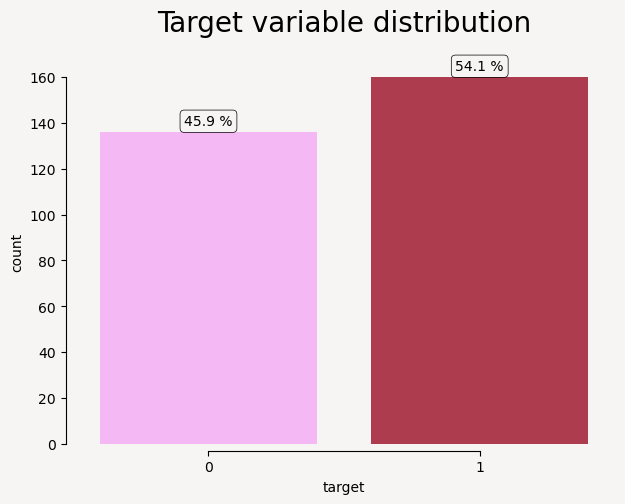

In [13]:
#mypal= ['blue', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
mypal = ["#FCD2FC", "#FEAEFE", "#FFD700", '#F3FEFA','#B4FFE4', "#C02942"]

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

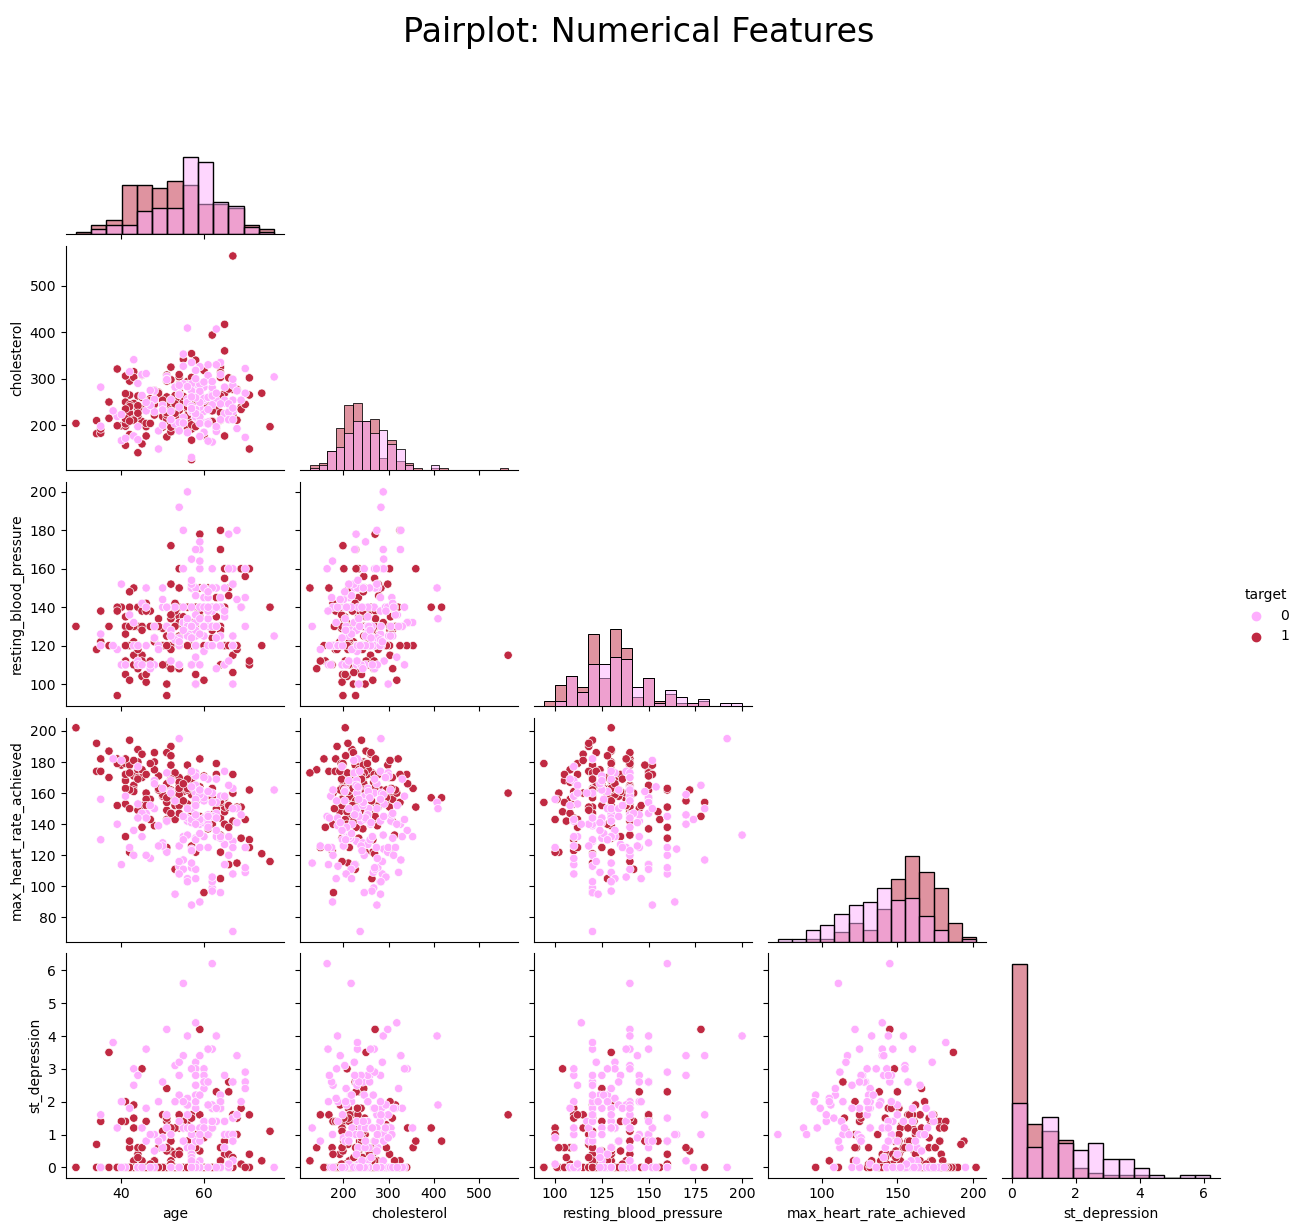

In [14]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = df[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

Age :  
The average age in the dataset is 54.5 years   
The oldest is 77 years, whereas the youngest is 29 years old  
Cholesterol:  
The average registered cholestrol level is 247.15   
Maximum level is 564 and the minimum level is 126.  
Note: According to [6], a healthy cholesterol level is  <200𝑚𝑔/𝑑𝑙  and usually high level of cholesterol is associated with heart disease.  
Resting blood pressure:  
131 mean, 200 max and 94 min  
Max heart rate achieved:  
The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.  
St_depression:  
The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.  
Number of major blood vessels:  x
A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.  

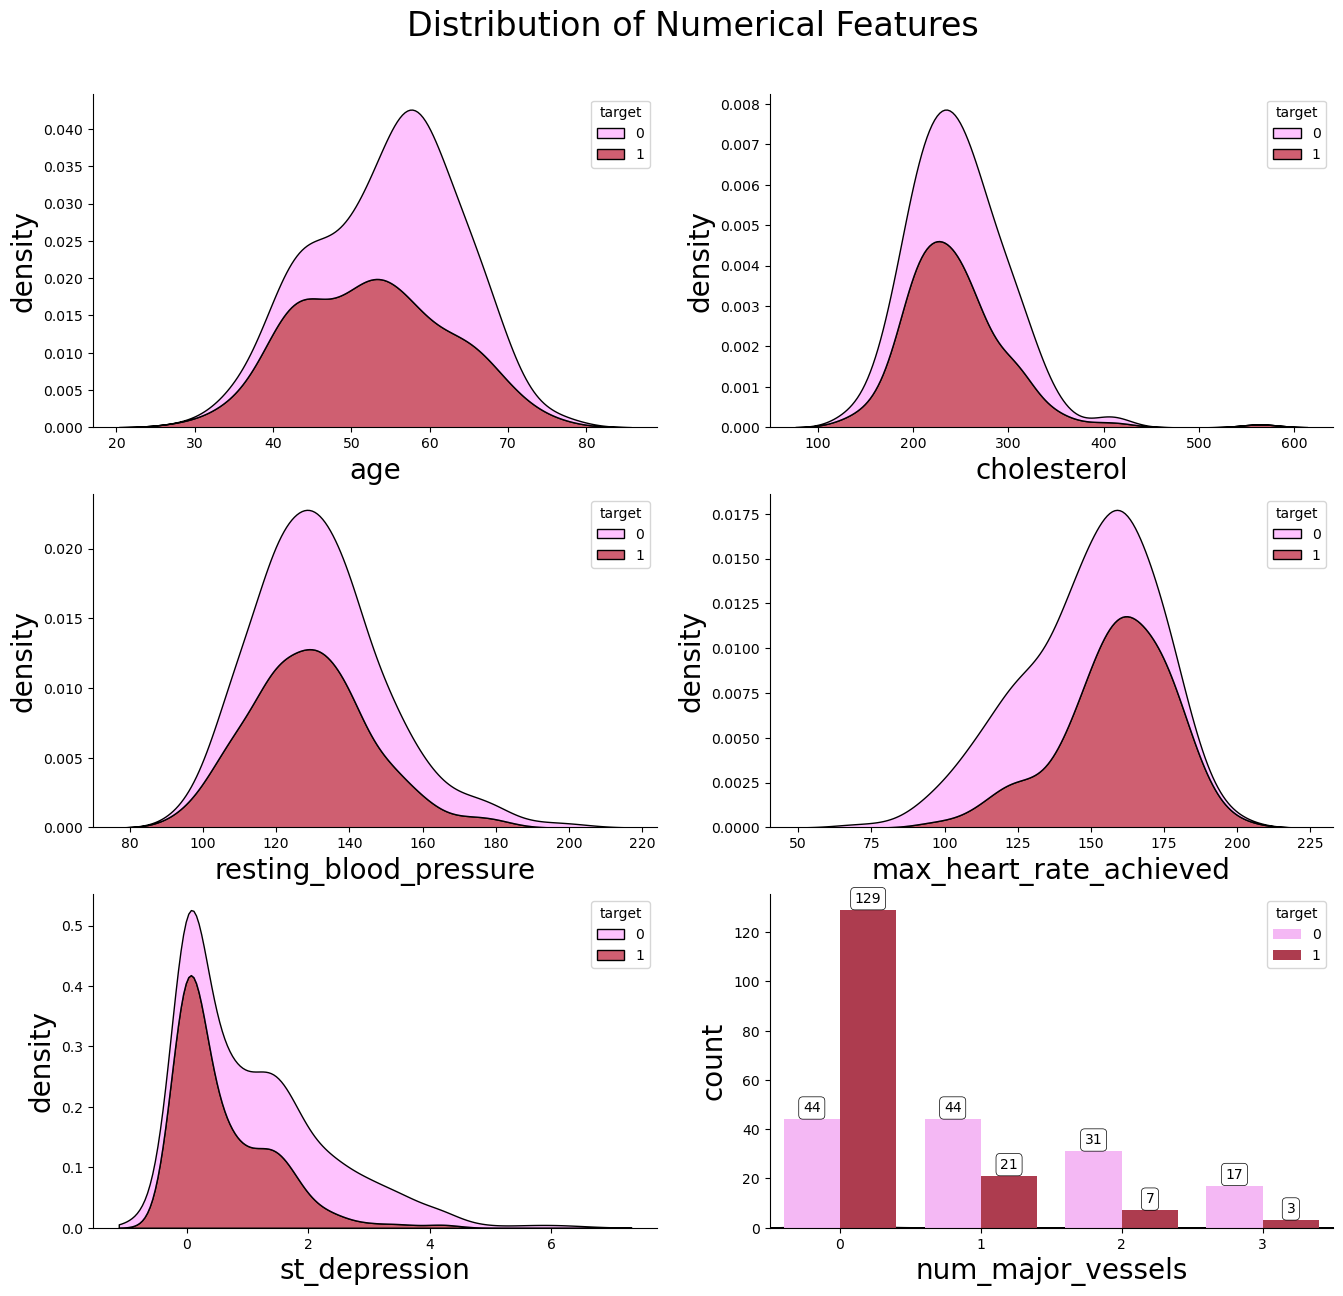

In [15]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='white')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='white')
    
    ax = sns.kdeplot(data=df, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

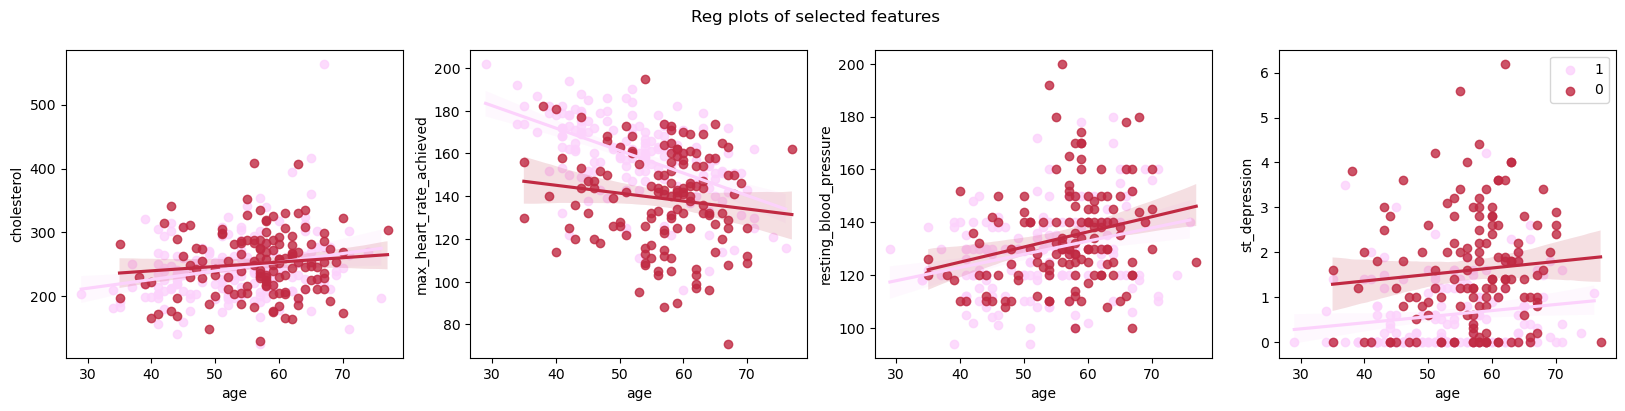

In [16]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

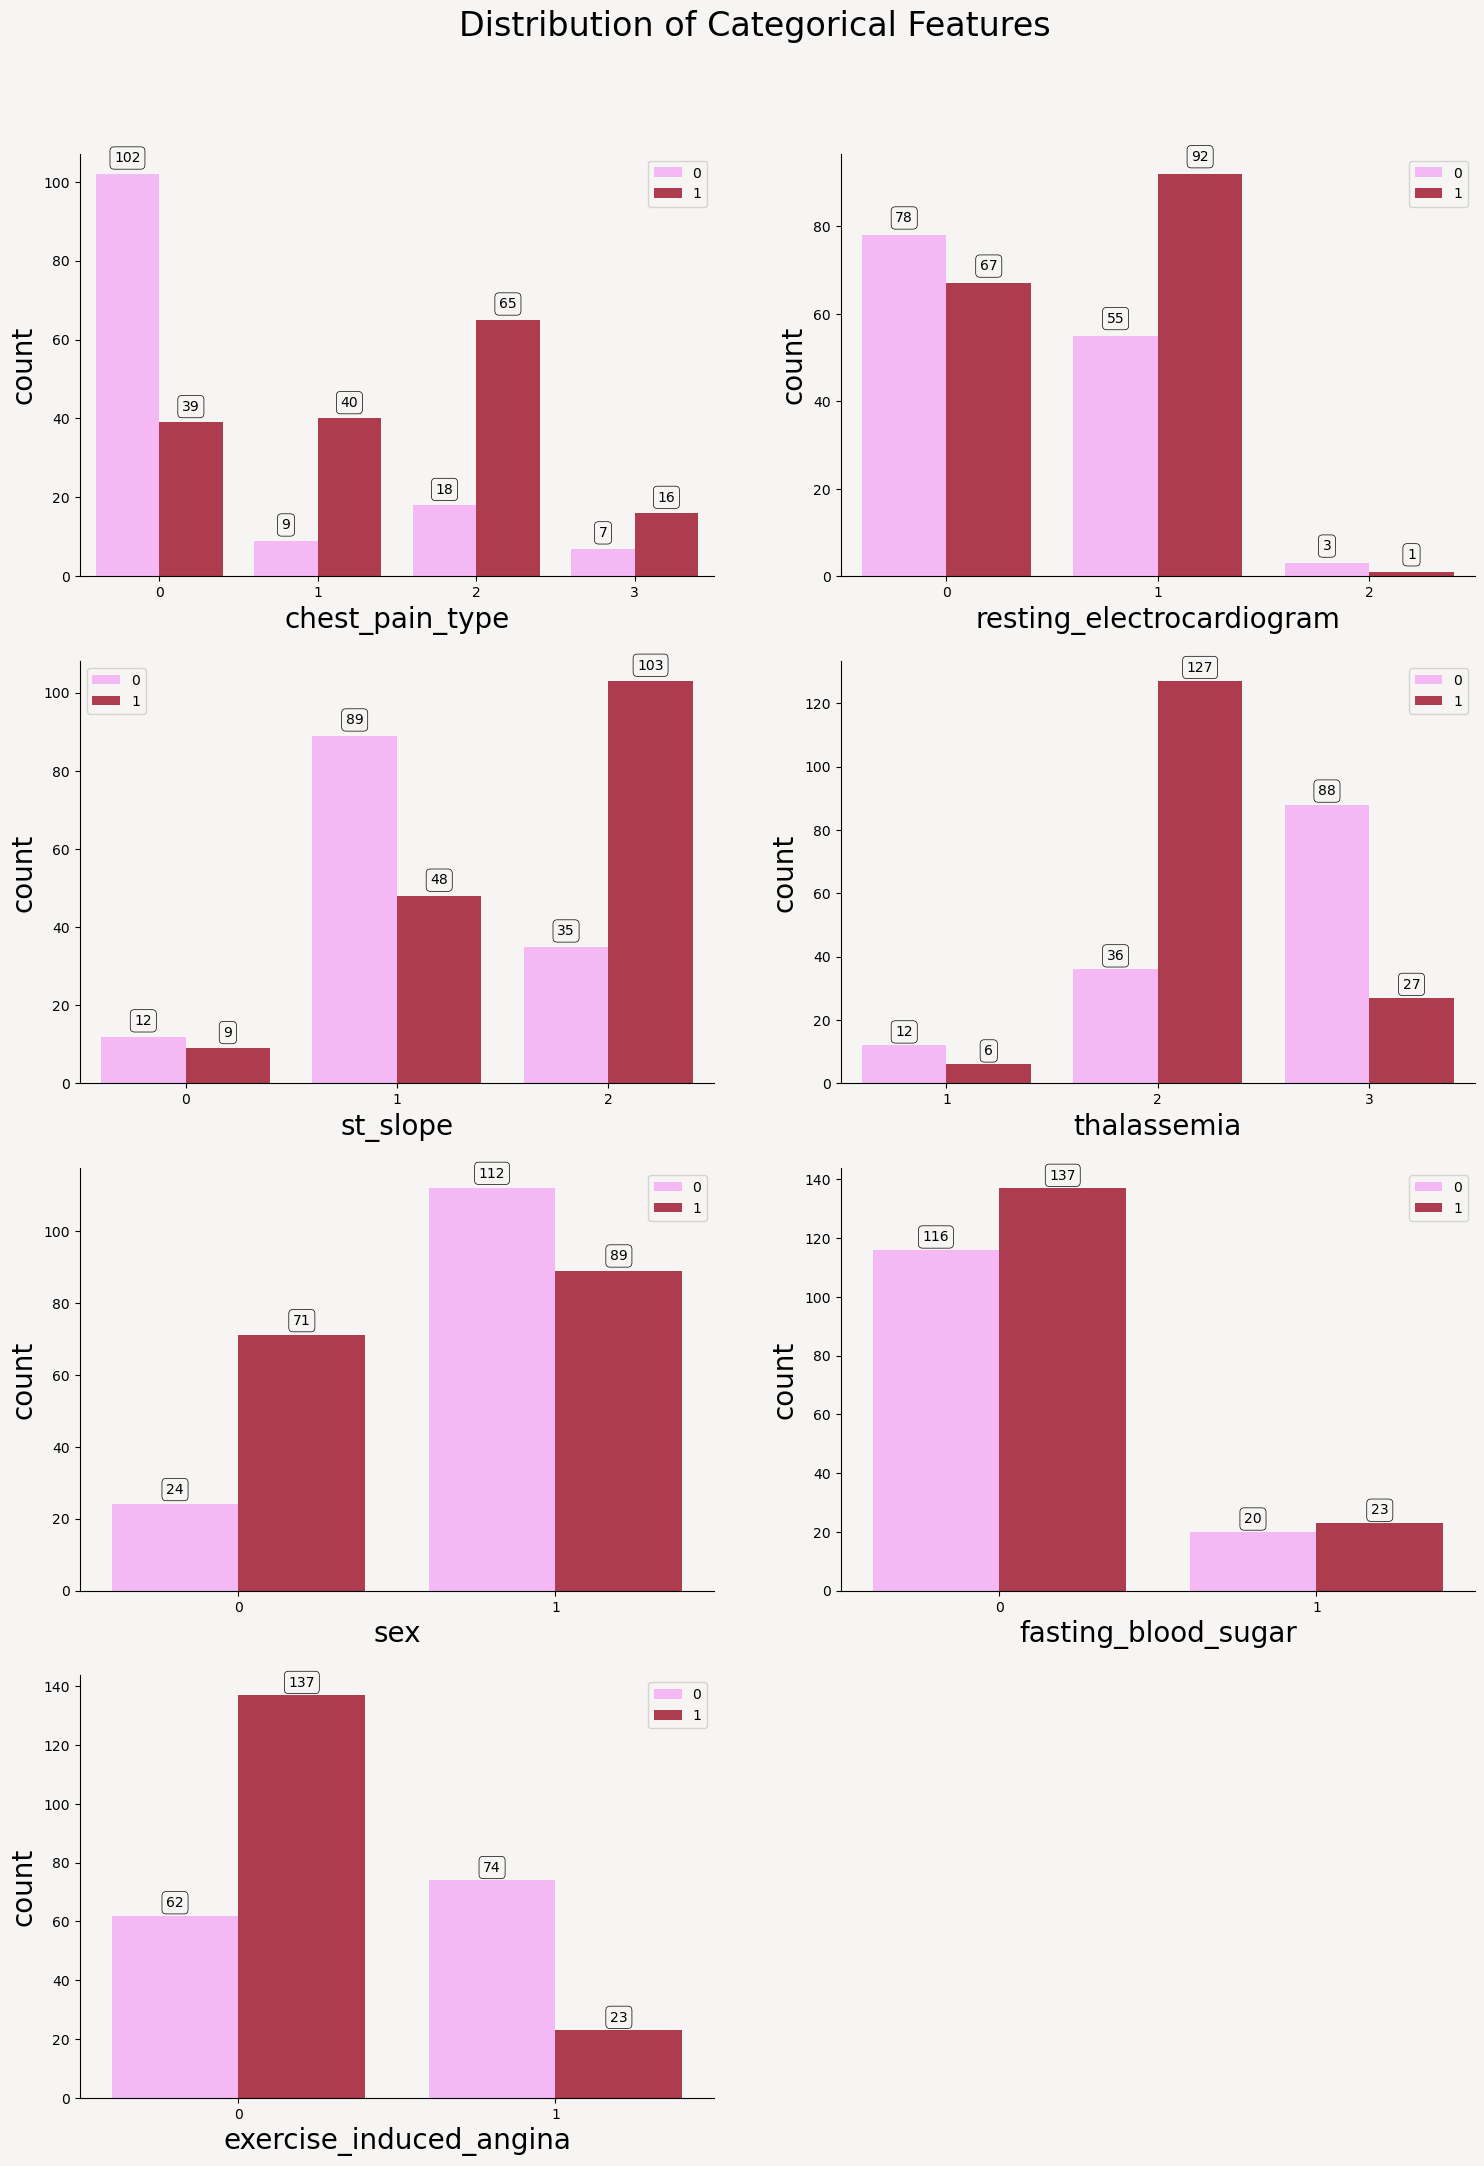

In [17]:
def count_plot(df, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(df, cat_feats[0:-1]);

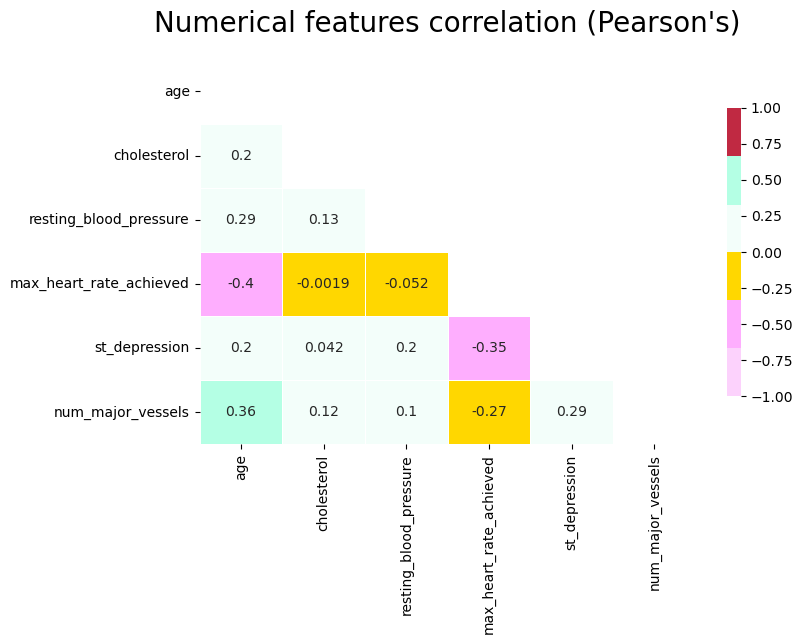

In [18]:
df_ = df[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

### v.Data Processing

In [19]:
# Split num cat col
X = df.drop(['target'],axis=1)
y = df.target

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)
X_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2


In [21]:
# Split num and cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical :{num_col}')

#difining categorical columns/features
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
# caterorical
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

print(f'categorical:{cat_feats}')

numerical :['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
categorical:['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia', 'sex', 'fasting_blood_sugar', 'exercise_induced_angina']


In [22]:
# Feature scaling and encoding in column transformer
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False) #sparse vs dense matrix

preprocess = ColumnTransformer(
    transformers=[
        ('numerical', scaler,num_feats),
        ('categorical', encoder,cat_feats)
        ], remainder='passthrough'
)
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['age', 'cholesterol',
                                  'resting_blood_pressure',
                                  'max_heart_rate_achieved', 'st_depression',
                                  'num_major_vessels']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['chest_pain_type',
                                  'resting_electrocardiogram', 'st_slope',
                                  'thalassemia', 'sex', 'fasting_blood_sugar',
                                  'exercise_induced_angina'])])

In [23]:
# Model definition using pipeline
pipe_log = make_pipeline(preprocess,LogisticRegression())
pipe_svc = make_pipeline(preprocess,SVC())
pipe_knn = make_pipeline(preprocess,KNeighborsClassifier())
pipe_nb = make_pipeline(preprocess,GaussianNB())
pipe_dt = make_pipeline(preprocess,DecisionTreeClassifier(random_state=70))
pipe_rf = make_pipeline(preprocess,RandomForestClassifier(random_state=70))
pipe_ada = make_pipeline(preprocess,AdaBoostClassifier())

In [24]:
cv_log = cross_val_score(pipe_log, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_nb = cross_val_score(pipe_nb, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_ada = cross_val_score(pipe_ada, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

In [25]:
name_model = []
cv_scores = 0
for cv,name in zip([cv_log,cv_svc,cv_knn,cv_nb,cv_dt,cv_rf,cv_ada],
                   ['log','svc','knn','nb','dt','rf','ada']):
    
    print(name)
    print('f1-score - All - Cross Validation :', cv)
    print('f1-score - Mean - Cross Validation :', cv.mean())
    print('f1-score - Std - Cross Validation :', cv.std())
    print('f1-score - Range of test set :', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*1)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print(f'Best Model: {name_model}')
print(f'Cross Val Mean from best model: {cv_scores}')

log
f1-score - All - Cross Validation : [0.88888889 0.88461538 0.84615385 0.85185185 0.80701754]
f1-score - Mean - Cross Validation : 0.855705503073924
f1-score - Std - Cross Validation : 0.029710336568262666
f1-score - Range of test set : 0.8259951665056613 - 0.8854158396421867
-
svc
f1-score - All - Cross Validation : [0.83636364 0.86792453 0.80769231 0.83018868 0.83018868]
f1-score - Mean - Cross Validation : 0.8344715661696794
f1-score - Std - Cross Validation : 0.01937263807771146
f1-score - Range of test set : 0.8150989280919679 - 0.8538442042473909
-
knn
f1-score - All - Cross Validation : [0.85185185 0.85714286 0.81481481 0.85185185 0.78571429]
f1-score - Mean - Cross Validation : 0.8322751322751323
f1-score - Std - Cross Validation : 0.02777651798604594
f1-score - Range of test set : 0.8044986142890863 - 0.8600516502611782
-
nb
f1-score - All - Cross Validation : [0.78688525 0.7755102  0.84       0.8627451  0.79245283]
f1-score - Mean - Cross Validation : 0.8115186756422335
f1

The best model is ***Random forest***

In [26]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['age', 'cholesterol',
                                                   'resting_blood_pressure',
                                                   'max_heart_rate_achieved',
                                                   'st_depression',
                                                   'num_major_vessels']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['chest_pain_type',
                                                   'resting_electrocardiogram',
                                                   'st_slope', 'thalassemia',
                                                   'sex', 'fasting_blood_sugar',
                                                   'exercise_induced_angina'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=70))])

In [27]:
# Evaluate model logistic regression
y_pred_train = pipe_rf.predict(X_train)
y_pred_test = pipe_rf.predict(X_test)

# Print classification report
print(f'Random Forest - train - Before Tuning:')
print(f'{classification_report(y_train, y_pred_train)}')
print('')
print(f'Random Forest - test - Before Tuning:')
print(f'{classification_report(y_test, y_pred_test)}')

Random Forest - train - Before Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       131

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236


Random Forest - test - Before Tuning:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        31
           1       0.81      0.76      0.79        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



Text(0.5, 1.0, 'Before Tuning-test')

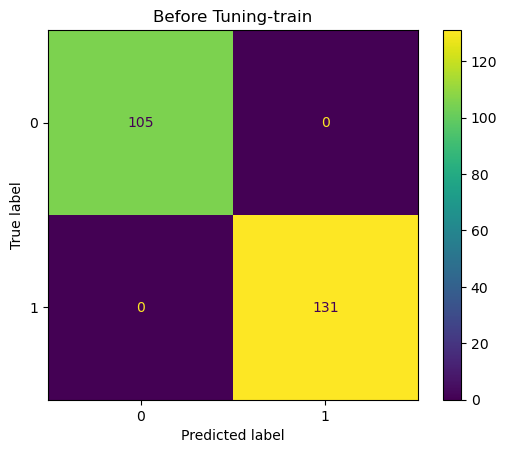

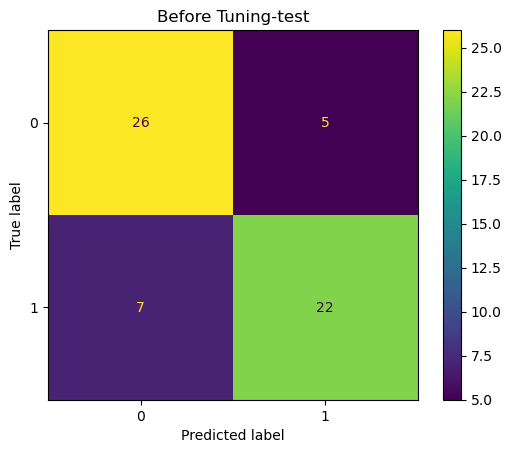

In [28]:
cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=pipe_rf.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=pipe_rf.classes_)

disp_train.plot()
plt.title('Before Tuning-train')

disp_test.plot()
plt.title('Before Tuning-test')

The value of train FN and FP = 0, it means that the f1-score train test is 100%.


The Test set FN = 7, it means that there are 7 number of values are wrong predicted. the prediction is  survived(negative) but the actual datanya is survived(positive).
The test set FP nya = 5 , it measn that there are 5 number or valuesaare wrong predicted, the prediction is  survived(positive) but the actual datanya is survived(negative)

In [29]:
# create function to table reports recap
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test,y_pred_test, name):
    # calculate f1-score
    train_f1 = f1_score(y_train,y_pred_train)
    test_f1 = f1_score(y_test,y_pred_test)

    # calculate fp fn
    cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_rf.classes_)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_rf.classes_)
    
    # extract FP FN
    fn_train = cm_train[1,0]
    fp_train = cm_train[0,1]
    fn_test = cm_test[1,0]
    fp_test = cm_test[0,1]

    # create dictionary
    score_reports = {
        'train-f1score':train_f1,
        'test-f1score':test_f1,
        'train-false negative':fn_train,
        'test-false negative':fn_test,
        'train-false positive':fp_train,
        'test-false positive':fp_test
    }

    # add reports
    all_reports[name] = score_reports
    return all_reports

In [30]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Before Tuning')
pd.DataFrame(all_reports)

,Before Tuning
test-f1score,0.785714
test-false negative,7.000000
test-false positive,5.000000
train-f1score,1.000000
train-false negative,0.000000
train-false positive,0.000000


In [31]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [32]:
# Define the random forest parameter grid
params = {
    'randomforestclassifier__n_estimators':(10,20,30,40,50,60,70,80,90,100,110),
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    'randomforestclassifier__max_depth':(1,2,3,4,5,6,7,8,9,10),
    'randomforestclassifier__min_samples_split':(2,4,6,8,10),
    'randomforestclassifier__min_samples_leaf':(1,2,3,4,5)
}

# Define Random search
tuning = RandomizedSearchCV(pipe_rf, param_distributions = params, n_iter=25,cv=5, scoring='f1', n_jobs=-1, random_state = 27)

# Train the tune model
tuning.fit(X_train, y_train)

# Get best parameters
best_params = tuning.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__criterion': 'entropy'}


In [33]:
# Get the best hyperparameters
bestParams = tuning.best_estimator_
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['age', 'cholesterol',
                                                   'resting_blood_pressure',
                                                   'max_heart_rate_achieved',
                                                   'st_depression',
                                                   'num_major_vessels']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['chest_pain_type',
                                                   'resting_electrocardiogram',
                                                   'st_slope', 'thalassemia',
                                                   'sex', 'fasting_blood_sugar',
                                                   'exercise_induced_angina'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=2, n_estimators=20,
                                        random_state=70))])

In [34]:
# Define best param & model tuning
best_rf = tuning.best_estimator_

# Evaluate best RF
y_pred_train_best = best_rf.predict(X_train)
y_pred_test_best = best_rf.predict(X_test)

# Print classification report
print(f'Random Forest - train - After Tuning:')
print(f'{classification_report(y_train, y_pred_train_best)}')
print('')
print(f'Random Forest - test - After Tuning:')
print(f'{classification_report(y_test, y_pred_test_best)}')

Random Forest - train - After Tuning:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       105
           1       0.90      0.92      0.91       131

    accuracy                           0.89       236
   macro avg       0.89      0.89      0.89       236
weighted avg       0.89      0.89      0.89       236


Random Forest - test - After Tuning:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.85      0.97      0.90        29

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



Text(0.5, 1.0, 'After Tuning-test')

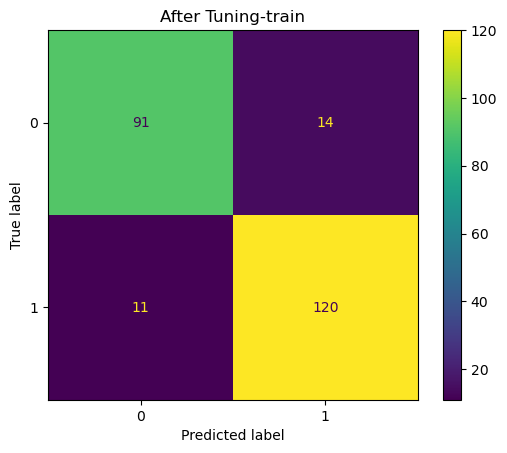

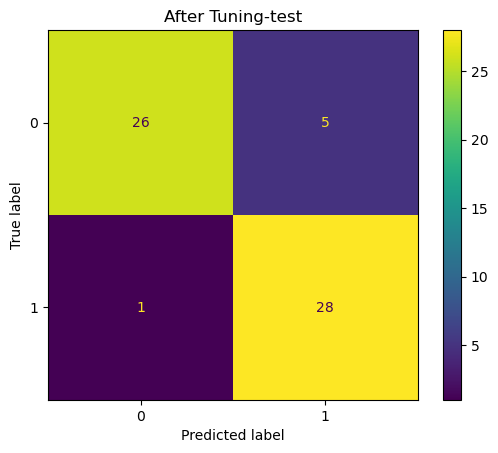

In [35]:
# Check False Negative and False Positive - After Tuning
cm_train_best = confusion_matrix(y_train, y_pred_train_best, labels=best_rf.classes_)
cm_test_best = confusion_matrix(y_test, y_pred_test_best, labels=best_rf.classes_)

disp_train_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_best, display_labels=best_rf.classes_)
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best, display_labels=best_rf.classes_)

disp_train_best.plot()
plt.title('After Tuning-train')

disp_test_best.plot()
plt.title('After Tuning-test')

In [36]:
all_reports = performance_report(all_reports, y_train, y_pred_train_best, y_test, y_pred_test_best, 'After Tuning')
pd.DataFrame(all_reports)

,Before Tuning,After Tuning
train-f1score,1.000000,0.905660
test-f1score,0.785714,0.903226
train-false negative,0.000000,11.000000
test-false negative,7.000000,1.000000
train-false positive,0.000000,14.000000
test-false positive,5.000000,5.000000


In [37]:
# Model Saving
with open('best_model.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(best_rf, file_1)

In [38]:
print(df_ori.columns)
print(df_ori.loc[10])

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
age          54.0
sex           1.0
cp            0.0
trestbps    140.0
chol        239.0
fbs           0.0
restecg       1.0
thalach     160.0
exang         0.0
oldpeak       1.2
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 10, dtype: float64


Before Tuning: 

1. The train F1 score was perfect (1.000000), which is often an indicator of overfitting, as the test F1 score was significantly lower (0.785714).
2. Before Tuning: There were no false negatives in the training data (0.000000), but there were 7 false negatives in the test data, indicating that the model missed some positive cases.
3. Before Tuning: There were no false positives in the training data (0.000000), and 5 false positives in the test data.

After Tunning:

1. After Tuning: Both train and test F1 scores became more balanced, with the train F1 score slightly decreasing to 0.905660 and the test F1 score improving significantly to 0.903226. This indicates better generalization and model performance on unseen data.
2. After Tuning: The number of false negatives increased to 11 in the training data, which suggests a trade-off was made to improve generalization. However, the false negatives in the test data reduced dramatically to 1, indicating that the model became much better at correctly identifying positive cases in the test set.
3. After Tuning: The number of false positives increased to 14 in the training data, while the number of false positives in the test data remained the same at 5. This indicates that the tuning process might have slightly compromised on precision to gain a better overall balance between precision and recall.


in other ward!

In conclusion, in this case, there was a considerable improvement in the model's capacity to generalise to new data, which decreased overfitting and increased test set performance metrics.


**** Thank you mas vincent!! ****